Linear Models
=========

## Least Squares

**Quesiton: ** How does one fit a straight line through a cloud of points in 2 dimensions?

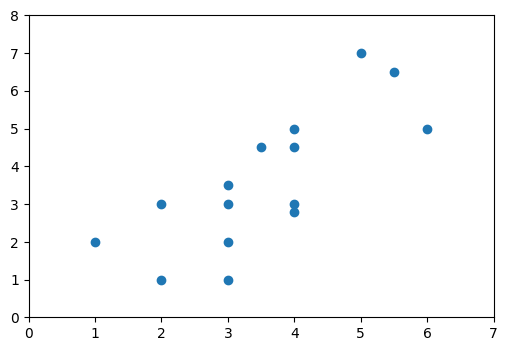

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([1,2,3,3,4,3.5,3,4,5.5,5,6,2,3,4,4])
y = np.array([2,3,1,2,3,4.5,3.5,4.5,6.5,7,5,1,3,2.8,5])

fig = plt.figure()
plt.scatter(x, y)
plt.xlim(0,7)
plt.ylim(0,8)
plt.show()

$x$ is the explanatory variable, and $y$ is the response variable.

$$y = b_0 ~+~ b_1 x$$

More generally, each $x_i$ is a k-dimensional vector. 

I.e., we want to an explanation like:

 $$y = b_0 ~+~ b_1x_1 + ...  ~+~ b_kx_k$$

Eaxh $x_j$ for $j=1,...,k$ is actually an n-dimensional vector of data. Thus, $x_j = (x_{i,j})~i=1,...,n$

Same quesiton here: fit a **hyperplane** of dimension $k$ in a $\mathbb{R}^{k+1}$ through that cloud of points $\displaystyle \left(x_{i,1}, ..., x_{i,k}, y_i\right)_{i=1,..,n}$

Problem is: the question is no precise. We need a precide criterion. We need to minimize the error between $y_i ~\&~ b_0 + \displaystyle \sum_{j=1}^k b_j x_{ij}$

We compute the Euclidean distance between the vector $y=\displaystyle \left(y_i\right)_{i=1}^n\in \mathbb{R}^n$ and the explnatory vector $\displaystyle \left(b_0 + \sum_{i=1}^k b_jx_j\right)_{i=1}^n$

$$Q(b) = \sum_{1}^n \left(y_i - \left(b_0 + \sum_{i=1}^k b_jx_j\right)\right)^2 \text{ Squared distance between }y\in \mathbb{R}^n \text{ and }b_0 + \sum_{i=1}^k b_jx_j \in \mathbb{R}^n$$

Finally, answer to the question is: find $b$ to make $Q(b)$ as small as possible.



##### Example: 

$\displaystyle k=1,~ y=\left(y_i\right)_{i=1}^n\in \mathbb{R}^n, ~x=\left(x_i\right)_{i=1}^n \in \mathbb{R}^n$

$$Q(b) = \sum_{i=1}^n \left(y_i - (b_0 + b_1x_i)\right)^2 = \|y - b_0\mathbb{1} + b_1x\|_{euclid}^2$$

The criterion "find $b$ to minimize $Q(b)$" is the PRINCIPLE of LEAST SQUARES.

 * Actual solution to this minimization problem: by definition of the problem, $\displaystyle \hat{y} = b_0\mathbb{1} + \sum_{j=1}^k b_j x_j$ for the optimal $b$ is the shortest distance between $y$ and $\hat{y}$:
 
$$$$

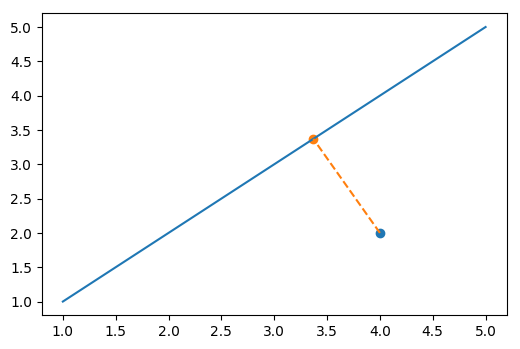

In [21]:
x = [1,5]
y = [1,5]

plt.plot(x,y)

plt.scatter(4,2)
plt.scatter(3.37,3.37)
plt.plot([4,3.37], [2,3.37], '--')
plt.show()

Then, we see that $\hat{y}$ should be exactly the orthogonal projection of the point $y$ onto the linear subspace $V$  generated by the data vectors $x_1,x_2,...,x_k$. This means $y - \hat{y} \perp V$. 

This really means the following:

$$\forall j=1,...,k: ~~~ y_.-\hat{y}_. \perp x_{.j}$$

Therefore, the only thing that we need to do is to solve the following for $b=(b_0,b_1,...,b_k)$:

$$\forall j=0,1,..,k: ~~~~ y-\sum_{j'=0}^k b_{j'}x_{j'} \perp x_j$$

here $x_0 = \left(\begin{array}{c}1\\1\\.\\.\\1\end{array}\right) = \text{n-dimensional vector of }1{'s}$

This is equivalent to

$$\forall j=0,1,...k:~~~~ \sum_{i=1}^n \left(y_i - \sum_{j'=0}^k b_{j'}x_{ij'}\right)\left(x_{ij}\right) = 0$$

These $k+1$ equations are all linear in $b=\left(b_0, b_1, ..., b_k\right)^T$. There are $k+1$ unknowns in $b$.

Our system is 

$$\forall j=0,..k: ~~~~ y_. \boldsymbol{\cdot} x_{.j} = \sum_{j'=0}^k b_{j'} ~ x_{.j}\boldsymbol{\cdot}x_{.j'}$$



 * We want to write this system in matrix-vector notation:

    * $b=\left(b_0, b_1, ..., b_k\right)^T$ is a k-dimensional column vector
    
    * Consider the matrix: $X^T = \left[\begin{array}{ccc} .. & x_0 & ..\\ .. & x_1 & ..\\ .. & .. & ..\\ .. & x_k & ..\end{array}\right]$ a $(k+1)\times n$-dimensional matrix
    
    * Notice: $\displaystyle \left(y \boldsymbol{\cdot} x_j\right)_{j=0}^k = X^T y$   
    
    * Also, notice the matrix $M = \displaystyle \left((x_ix_{j'})\right)_{\begin{array}{c}j=0,...,k\\j'=0,...,k\end{array}}$ can be expressed as $M = X^T X$

      Therefore, the right-hand side of the system $\displaystyle \sum_{j'=0}^k b_{j'} x_{j}\boldsymbol{\cdot} x_{j'}$ is the $k+1$-dimensional vector $Mb$   
      
      Summarizing: our system is:

$$X^T y ~=~ Mb$$

(this is called the "normal equation"; here, normal refers to orthogonality.)

If the vectors $x_0,x_1,...,x_n$ are linearly independent, then $M$ is invertible.

Therefore solution is:

$$b = M^{-1} X^T y$$

 * $M$ is called the design matrix, usually people use the notation $U = X^Ty$

 * The error in this regression is $e = y - \hat{y}$.    
   Since by defintion, $e \perp x_j ~~\forall j$, therefore, $e \perp \hat{y}$ then by Pythagoras we write that $\displaystyle \|y\|^2 = \|y-\hat{y} + \hat{y}\|^2 = \|y-\hat{y}\|^2 + \|\hat{y}\|^2$ 
   
    * $\|\hat{y}\|^2 = \text{Total Sum of Squares}$   
    
    * $\|y-\hat{y}\|^2 = \|e\|^2 = \text{Residual Sum of Squares (or Error sum of Squares)}$   
    
    * $\|\hat{y}\|^2 = \text{Regression Sum of Squares}$
   
   $$"TSS" = "ResidualSS"  ~+~ "RegressionSS"$$

$$TSS = RSS + ESS$$

 * It turns out $$\displaystyle \|\hat{y}\|^2 = U^T b = \left(X^T y\right)^T b$$

 * In case $k=1$, thurns out $$b = \frac{1}{\|x\|^2}x^T y$$
 


Now, let's look in more detail in $k=1$ case, and identify $\bar{x}=\text{mean of }x$ and $\bar{y} = \text{mean of }y$ and use $b_0$ and $b_1$.

  * We know that $\hat{y} = b_0 + b_1 x~~~~ \left(x,y ~\in~\mathbb{R}\right)$   
  
    In another words, $$\begin{array}{ll} \forall i=1,...,n: ~~~~ \hat{y}_i &  = b_0 + b_1x_i \\ &= a_0 + a_1(x_i - \bar{x})\end{array}$$
    
    Now, find $a_0 \& a_1$.
    
  * It turns out : $a_1 = b_1$ also $a_0 = \bar{y}$
  
    Therefore, the regression line is $y = \bar{y} = b_1 (x- \bar{x})$

    and in particular, the "point of averages $(\bar{x},\bar{y})$" is on the line.

  * Also, turns out that $$b_1 = \frac{~~ S_{xy} ~~ }{ ~~ S_{xx} ~~ } = \frac{\displaystyle \sum_{i=1}^n (x_ i -\bar{x})y_i}{\displaystyle \sum_{i=1}^n (x_i - \bar{x})^2}$$
  
  $$b_0 = \bar{y} - b_1 \bar{x}$$
  
  * Also, $$\begin{array}{lcl}\text{RegressionSS} &=& \displaystyle \|\hat{y}\|^2 = \bar{y}^2 n +  \frac{~~ S_{xy} ~~ }{ ~~ S_{xx} ~~ } \\ \text{ResidualSS} &=&  \displaystyle \|y - \hat{y}\|^2 = \|y\|^2 - \|\hat{y}\|^2 = \sum_{i=1}^n y_i^2 - \bar{y}^2n - \frac{~~ S_{xy} ~~ }{ ~~ S_{xx} ~~ } \\ &=& \sum_{i=1}^n (y_i - \bar{y})^2 - \frac{~~ S_{xy} ~~ }{ ~~ S_{xx} ~~ }\end{array}$$   
  
  * **Correlation Coefficient: **  $$r = \frac{S_{xy}}{\displaystyle \sqrt{S_{xx} + S_{yy}}}$$   
  
  Note: we can find $b_1$ by converting $r$ into the right scale:
  
  $$b_1 = r \frac{\sqrt{S_{yy}}}{\sqrt{S_{xx}}}$$
  
  * ***Coefficient of Determination: ***
  
  $$R^2 = \frac{\displaystyle \text{Regression Sum of Squares (RegressionSS)}}{\displaystyle \text{Total Sum of Squares (TotalSS)}}$$
  
    * $R^2$ is  interpreted as the proportion of variablity in the data $y$ which is explained by the data $x$ via $\hat{y}$. 
    
      See: $0 \le R^2 \le 1$. We want $R^2$ as large as possible.

 * General case: $k \ge 1$:
 
    * $R^2 = \text{same definition as befpre}$
    
    * $R = \sqrt{R^2} = \text{Multiple Regression Coefficient}$

---------------

## Probability in linear models

Let's say $Y$ is explained as  $Y = \beta x + \epsilon$
 * $Y$ is a random vector in $\mathbb{R}^n$
 * $\epsilon$ is also a random vector in $\mathbb{R}^n; iid$
 
 $Y = \left(Y_i\right)_{i=1}^n$ and $\epsilon = \left(\epsilon_i\right)_{i=1}^n$
 
 Assume $\mathbf{E}[\epsilon_i] = 0$ and $\mathbf{Conv}[\epsilon_i, \epsilon_j] = 0 \text{ if } i\ne j$ and preferable, $\epsilon_i$'s are all $iid$. In particular, $\mathbf{Var}[\epsilon_i] = \sigma^2 = Constant$
 
 Hope: based on some initial data analysis where $k=1$, and we found "a large" $R^2$ for least-square regression of $y$ data against $x$ data. Now, model $y$ is coming from random variable $Y$ with e.g. $\epsilon_i ~~ iid ~~ \mathcal{N}(0,\sigma^2)$.
 
**Question:** find properties of estimator for $\beta$. This $\beta$ is an unknown true parameter. 

 Strategy: use least-squares to estimate $\beta$

Since $k=1$, we know $b_1 = \frac{S_{xy}}{S_{xx}} = \frac{x \cdot y}{\|x\|^2}$. This suggests that an estimator for $\beta$ should be 

$$\hat{\beta} = \frac{x \cdot Y}{\|x\|^2} = \frac{x\cdot (\beta x + \epsilon)}{\|x\|^2} = \beta +\frac{x\cdot \epsilon}{\|x\|^2} $$

This $\hat{\beta}$ is the least-squares estimator for $\beta$ using the data $x$ and the model for $Y$.

 * Is it unbiased? Yes, because $\mathbf{E}[\epsilon_i] = 0 \forall i$   
 
 * How about variance $\mathbf{Var}[\hat{\beta}]$? $$\mathbf{Var}[\hat{\beta}] = \mathbf{E}\left[\left(\frac{1}{\|x\|^2} x \cdot \epsilon\right)^2\right] = \frac{1}{\|x\|^4}  \mathbf{E}\left[\left(\sum_{i=1}^n x_i \epsilon_i\right)^2\right] \\ = \frac{1}{\|x\|^4}  \mathbf{E}\left[\sum_{i=1}^n \sum_{i'=1}^n x_i x_{i'} \epsilon_i \epsilon_{i'} \right]\\ = \frac{1}{\|x\|^4}  \sum_{i=1}^n (x_i)^2 \mathbf{Var}[\epsilon_i]$$

here, we used the assumption that $\epsilon_i$ and $\epsilon_{i'}$ are uncorrelated if $i\ne i'$.

$$ = \sigma^2 \frac{\|x\|^2}{\|x\|^4}$$

We proved that if $\mathbf{Var}[\epsilon_i] = \sigma^2 ~(constant) \forall i$ and $\epsilon_i \& \epsilon_{i'}$ are uncorrelated for $i\ne i'$, then

$$\mathbf{Var}[\hat{\beta}] = \frac{\sigma^2}{\|x_i\|^2}$$

This is small if $n$ is big.